In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

import json
import numpy as np
from locality.utils.dataclasses import (
    ExperimentResults,
    LayerPatchingEfficacy,
    PatchingResults_for_one_pair,
    PatchingTrialResult,
    PredictedToken,
)

In [39]:
# ------------------------------------------------
results_path = "locality_results/layer_significance/Llama-2-7b-hf/P17"
# ------------------------------------------------

result_shards = list(os.listdir(results_path))

In [40]:
trials: list[PatchingTrialResult] = []

for file in result_shards:
    print(file)
    with open(os.path.join(results_path, file), "r") as f:
        cur_experiment = json.load(f)
    for trial in cur_experiment["trial_results"]:
        trial["patching_results"] = []
        trials.append(PatchingTrialResult.from_dict(trial))

f"parsed {len(trials)} trials"

layer_edit_efficacy_88810.json
layer_edit_efficacy_709106.json
layer_edit_efficacy_71745.json
layer_edit_efficacy_756785.json
layer_edit_efficacy_953912.json


'parsed 20 trials'

In [55]:
layers = list(range(len(trials[0].layer_patching_effecacy)))
recall_at_1 = []

for trial in trials:
    recall_at_1.append(
        [layer.recall[0] for layer in trial.layer_patching_effecacy]
    )

recall_at_1 = np.array(recall_at_1)
recall_at_1.shape

(20, 32)

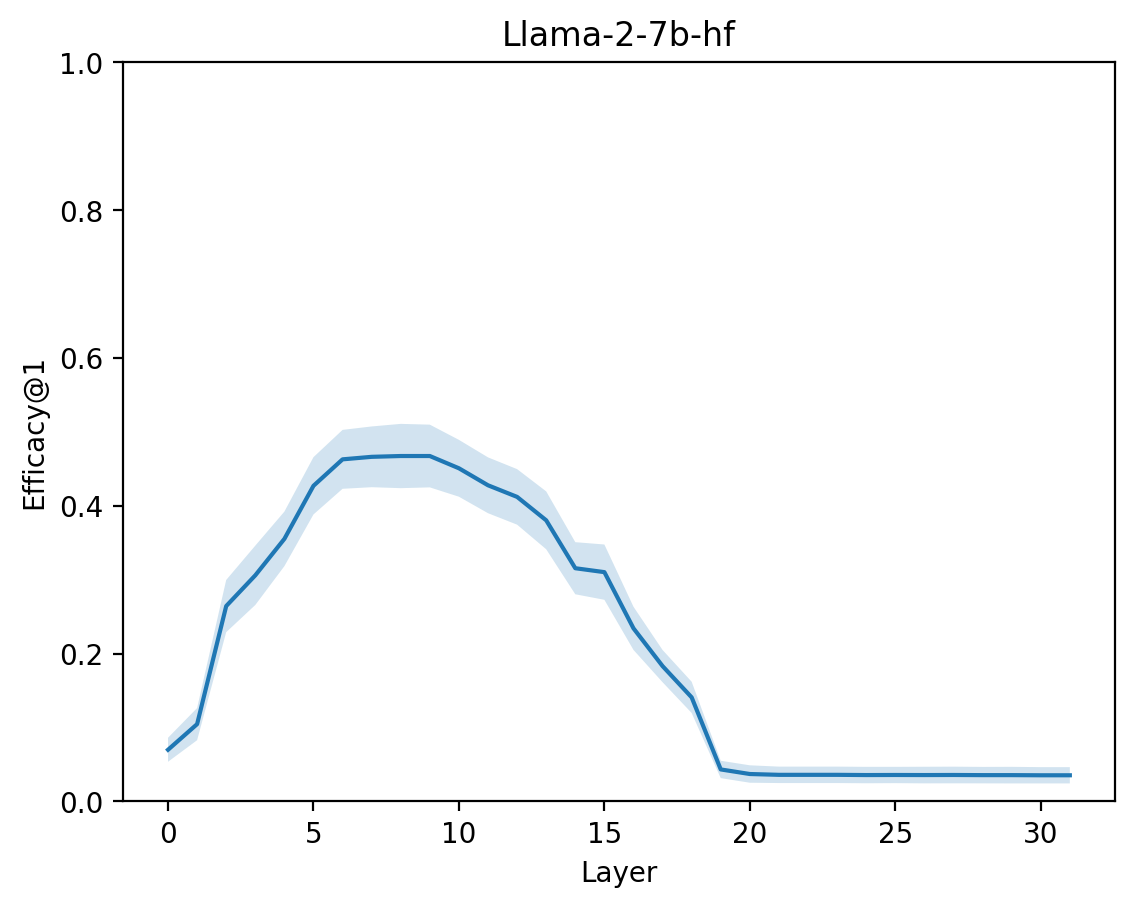

In [63]:
avg = recall_at_1.mean(axis=0)
std = recall_at_1.std(axis=0)

import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams["figure.dpi"] = 200

plt.plot(layers, avg, linewidth=1.5)
plt.fill_between(layers, avg - std, avg + std, alpha=0.2)
plt.xlabel("Layer")
plt.ylabel("Efficacy@1")
plt.title("Llama-2-7b-hf")
plt.ylim(0, 1)
plt.show()


In [170]:
from locality.utils.dataclasses import TrialResult
model_performance: list[TrialResult] = []

path = "locality_results/model_performance/Llama-2-7b-hf"
file = os.listdir(path)[0]

with open(os.path.join(path, file), "r") as f:
    json_performance = json.load(f)

for trial in json_performance["trial_results"]:
    trial["samples"] = []
    model_performance.append(TrialResult.from_dict(trial))

In [174]:
recalls = [
    trial.recall[0] for trial in model_performance
]

recalls = np.array(recalls)

f"{recalls.mean():.3f} +/- {recalls.std():.3f}"

'0.598 +/- 0.077'